## Gerekli Kütüphanelerin import edilmesi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
import seaborn as sns


# İlk Örnek

#### Sentetik dataset oluşturalım

In [2]:
X ,y = make_classification(n_samples=1000,n_features=4,n_redundant=0, n_classes=2,random_state=42)

In [3]:
X.shape

(1000, 4)

In [4]:
y[:10]

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0])

#### Dataseti train ve test diye ayıralım

In [5]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.shape

(800, 4)

#### Modelin Oluşturulması ve Eğitilmesi

In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
model.score(X_train, y_train)

0.8693333333333333

In [33]:
model.score(X_test, y_test)

0.8576

# İkinci Örnek

#### Sentetik datasetlerin oluşturulması

In [11]:
X ,y = make_classification(n_samples=5000,n_features=8,n_redundant=2, n_classes=2, random_state=42)

<AxesSubplot:>

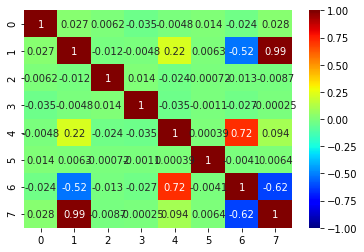

In [12]:
X_df = pd.DataFrame(X)
sns.heatmap(X_df.corr(), annot=True, vmin=-1, vmax=1, cmap="jet")

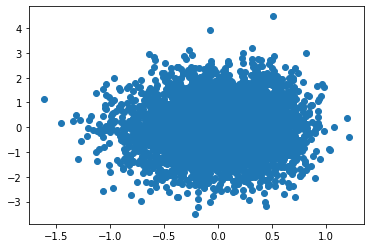

In [13]:
plt.scatter(X[:,1],X[:,0])

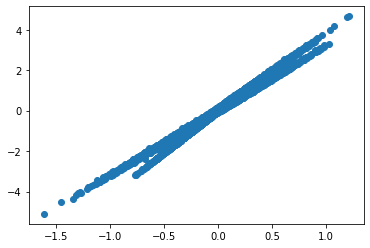

In [14]:
plt.scatter(X[:,1],X[:,7])

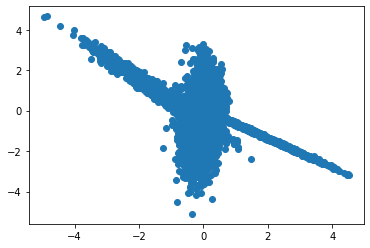

In [15]:
plt.scatter(X[:,6],X[:,7])

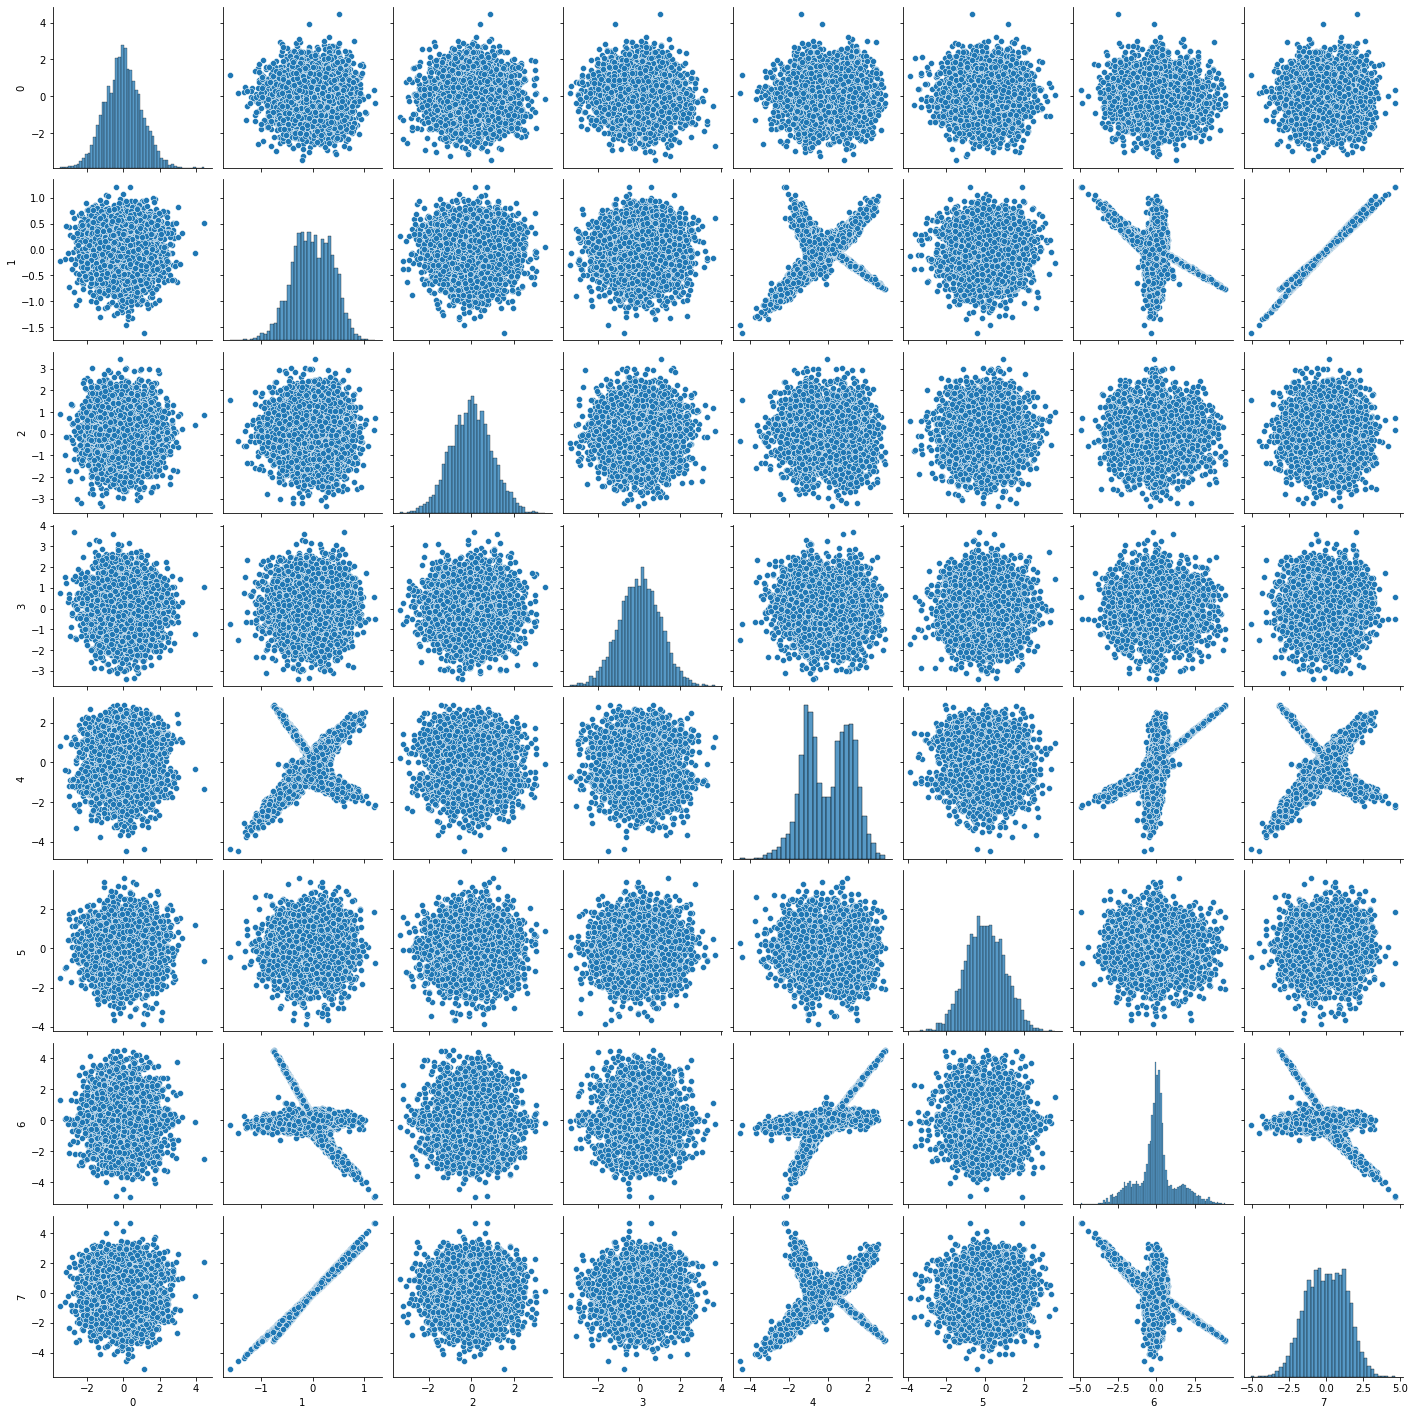

In [16]:
sns.pairplot(X_df)

In [17]:
X[0]

array([ 0.94276373,  0.52329782,  0.98182194,  2.78591191, -0.9610758 ,
        0.31988797, -2.13169224,  2.02047249])

In [18]:
X.shape

(5000, 8)

In [19]:
y.shape

(5000,)

#### Train Test Split

In [20]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.25)

In [21]:
X_train.shape

(3750, 8)

#### Model Oluşturma

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train, y_train)

LogisticRegression()

#### Model Scorelarını inceleme

In [24]:
model.score(X_train, y_train)

0.8693333333333333

In [25]:
model.score(X_test, y_test)

0.8576

#### Model katsayı ve intersept değerlerini bulma

In [27]:
model.intercept_

array([0.0188368])

In [28]:
model.coef_

array([[ 0.05808314,  0.4706724 , -0.01280316,  0.02964649,  0.30082858,
        -0.03839051, -0.81911753,  1.63975572]])

#### cross validate

In [34]:
cvs = cross_validate(estimator=model, X= X, y=y, cv = 10, n_jobs= -1, return_train_score= True)

In [35]:
cvs

{'fit_time': array([0.01616764, 0.00742769, 0.02140117, 0.01197767, 0.01406813,
        0.01279616, 0.00482631, 0.00655341, 0.01513171, 0.01184773]),
 'score_time': array([0.00051785, 0.00084329, 0.00073409, 0.00051355, 0.00128412,
        0.00049973, 0.00054288, 0.00030041, 0.00060797, 0.00050449]),
 'test_score': array([0.852, 0.894, 0.852, 0.87 , 0.872, 0.866, 0.846, 0.858, 0.886,
        0.852]),
 'train_score': array([0.86688889, 0.86133333, 0.86755556, 0.864     , 0.86466667,
        0.86622222, 0.86888889, 0.86644444, 0.86333333, 0.86888889])}

In [36]:
cvs[ 'test_score'].mean()

0.8648

In [37]:
cvs[ 'train_score'].mean()

0.8658222222222223

#### Model predict ve predict_proba attributeları 

In [38]:
np.array([ 0.94276373,  0.52329782,  0.98182194,  2.78591191, -0.9610758 ,
        0.31988797, -2.13169224,  2.02047249]).reshape(1,-1)

array([[ 0.94276373,  0.52329782,  0.98182194,  2.78591191, -0.9610758 ,
         0.31988797, -2.13169224,  2.02047249]])

In [39]:
y_acd = model.predict_proba(np.array([ 0.94276373,  0.52329782,  0.98182194,  2.78591191, -0.9610758 ,
        0.31988797, -2.13169224,  2.02047249]).reshape(1,8))
y_acd

array([[0.00577912, 0.99422088]])

In [40]:
y_acd = model.predict_proba(X[0:1])
y_acd

array([[0.00577912, 0.99422088]])

In [41]:
y_pred = model.predict(X_test)

In [42]:
y_pred

array([0, 0, 1, ..., 1, 1, 0])

#### Modelin Skorlarını elde edelim

In [43]:
precision_score(y_test, y_pred)

0.8346839546191248

In [44]:
recall_score(y_test, y_pred)

0.871404399323181

In [45]:
f1_score(y_test, y_pred)

0.8526490066225165

In [46]:
cnf = confusion_matrix(y_test, y_pred)
cnf

array([[557, 102],
       [ 76, 515]])

Text(0.5, 15.0, 'Predicted')

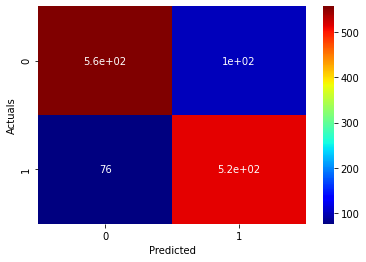

In [47]:
sns.heatmap(cnf, annot=True, cmap="jet" )
plt.ylabel("Actuals")
plt.xlabel("Predicted")

# Yukarıda korelasyon iki sutun vardı. Birini silip tekrar modelliyorum

In [48]:
X1 = X[:,0:-1]
X1.shape

(5000, 7)

<AxesSubplot:>

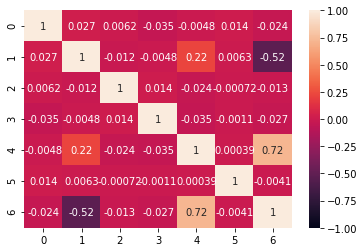

In [49]:
sns.heatmap(pd.DataFrame(X1).corr(), annot=True, vmin=-1, vmax=1)

In [50]:
X1_train, X1_test, y1_train,y1_test = train_test_split(X1, y, test_size=0.25)

In [51]:
model = LogisticRegression()

In [52]:
model.fit(X1_train, y1_train)

LogisticRegression()

In [53]:
model.score(X1_train, y1_train)

0.8629333333333333

In [54]:
model.score(X1_test, y1_test)

0.8704

In [55]:
cvs1 = cross_validate(estimator=model, X= X1, y=y, cv = 10, n_jobs= -1, return_train_score= True)

In [56]:
cvs1["test_score"].mean()

0.8646

In [57]:
cvs1["train_score"].mean()

0.8658222222222223

In [58]:
model.coef_

array([[ 0.10582091,  1.86513159,  0.04845865, -0.00464634,  1.79256949,
        -0.04286654, -2.67998983]])

In [59]:
model.intercept_

array([-0.0445235])

In [60]:
# decision boundry

In [61]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=53)

Text(0, 0.5, 'x2')

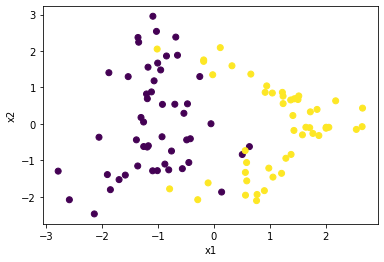

In [62]:
plt.scatter(X.T[0], X.T[1], c=y)
plt.xlabel('x1')
plt.ylabel('x2')

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
model=LogisticRegression(solver='liblinear', C=0.1)

In [65]:
model.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

In [66]:
x11, x22 = np.meshgrid(
    np.linspace(X.T[0].min(), X.T[0].max(), 1000),
    np.linspace(X.T[1].min(), X.T[1].max(), 1000)
)

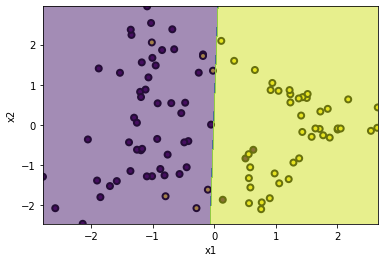

In [67]:
plt.scatter(X.T[0], X.T[1], c=y, edgecolors='black', linewidths=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.contourf(x11,
             x22,
             model.predict(
                 np.array(
                     [x11.ravel(),
                     x22.ravel()]
                         ).T).reshape(x11.shape), alpha=0.5)

In [ ]:
# decision boundry with Polynomial Features

In [68]:
from sklearn.preprocessing import PolynomialFeatures

In [87]:
model=LogisticRegression(solver='lbfgs', C=0.1)
poly = PolynomialFeatures(2)
poly.fit(X)

PolynomialFeatures()

In [88]:
for p in [2,3,4,5]:
    poly = PolynomialFeatures(p)
    poly.fit(X)
    score = cross_validate(model, poly.transform(X), y, cv=30)['test_score'].mean()
    ts = cross_validate(model, poly.transform(X), y, cv=30, return_train_score=True)['train_score'].mean()
    print('degree:', p, 'score:', round(score,3), 'train:', round(ts,3))

degree: 2 score: 0.906 train: 0.919
degree: 3 score: 0.925 train: 0.954
degree: 4 score: 0.914 train: 0.959
degree: 5 score: 0.917 train: 0.957


In [89]:
model.fit(poly.fit_transform(X), y)

LogisticRegression(C=0.1)

In [90]:
x11, x22 = np.meshgrid(
    np.linspace(X.T[0].min(), X.T[0].max(), 1000),
    np.linspace(X.T[1].min(), X.T[1].max(), 1000)
)

In [91]:
x11.shape

(1000, 1000)

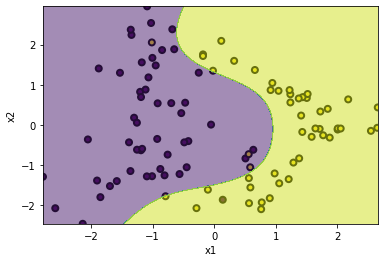

In [92]:
plt.scatter(X.T[0], X.T[1], c=y, edgecolors='black', linewidths=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.contourf(x11,
             x22,
             model.predict(
                 poly.transform(np.array(
                     [x11.ravel(),
                     x22.ravel()]
                         ).T)
             ).reshape(x11.shape), alpha=0.5)